# Logistic Regression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
dataset = load_breast_cancer()

In [4]:
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df["target"] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
X = df[dataset.feature_names].values
y = df["target"].values.reshape(-1,1)

X.shape, y.shape

((569, 30), (569, 1))

In [6]:
def linear_model_format_X(X):
    if len(X.shape) == 1:
        X = X.copy().reshape(-1,1)
    
    return np.hstack(tup= ( np.ones(shape=(X.shape[0],1)) , X ) )

## Cost Function

In [7]:
def calculate_entropy_cost(y_pred,y):
    
    part_1 = y * np.log(y_pred)
    
    part_2 = (1 - y) * np.log(1 - y_pred) 
    
    cost = ( -1 / y_pred.shape[0] ) * np.sum(part_1 + part_2)   
    return cost

## Sigmoid Function

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Gradient Descent Algorithm

In [9]:
class LogisticRegression:
    def __init__(self,alpha = 0.01 ,iterations = 10000):
        self.alpha = alpha
        self.iterations = iterations
        self._theta = None
        self._X = None
        self._y = None
        self._theta_history = None
        self._cost_history = None
    
    def _format_X_for_theta_0(self,X_i):
        
        X_i = X_i.copy()
        if len(X_i.shape) == 1:
            X_i = X_i.reshape(-1,1)
            
        if False in (X_i[...,0] == 1):        
            return np.hstack(tup=(np.ones(shape=(X_i.shape[0],1)) , X_i))
        else:
            return X_i
    
    @property
    def X(self):
        return self._X
    
    @property
    def y(self):
        return self._y
    
    @property
    def theta(self):
        return self._theta
    
    @property
    def theta_history(self):
        return self._theta_history
    
    @property
    def cost_history(self):
        return self._cost_history
    
    def predict(self,X):
        format_X = self._format_X_for_theta_0(X)
        
        if format_X.shape[1] == self._theta.shape[0]:
            y_pred = sigmoid(format_X @ self._theta) # (m,1) = (m,n) * (n,1)
            return y_pred
        elif format_X.shape[1] == self._theta.shape[1]:
            y_pred = sigmoid(format_X @ self._theta.T) # (m,1) = (m,n) * (n,1)
            return y_pred
        else:
            raise ValueError("Shape is not proper.")
            
    
    def train(self, X, y, verbose=True, method="BGD", theta_precision = 0.001, batch_size=30, regularization=False, penalty=1.0):
        
        self._X = self._format_X_for_theta_0(X)
        self._y = y

        # number of features+1 because of theta_0
        self._n = self._X.shape[1]
        self._m = self._y.shape[0]

        self._theta_history = []
        self._cost_history = []

        if method == "BGD":
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                # calculate y_pred 
                y_pred = self.predict(self._X)
                
                # new θ to replace old θ
                new_theta = None

                # simultaneous operation 
                
                if regularization:
                    gradient = np.mean( ( y_pred - self._y ) * self._X, axis = 0 )
                    new_theta = self._theta * (1 - (penalty/self._m) ) - (self.alpha *  gradient)
                    
                else:
                    gradient = np.mean( ( y_pred - self._y ) * self._X, axis = 0 )
                    new_theta = self._theta - (self.alpha *  gradient)

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_entropy_cost(y_pred = self.predict(X=self._X), y = self._y)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
                
        elif method == "SGD": # stochastic gradient descent
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                
                # creating indices for batches
                indices = np.random.randint(0,self._m,size=batch_size)
                
                # creating batch for this iteration
                X_batch = np.take(self._X,indices,axis=0)
                y_batch = np.take(self._y,indices,axis=0)
                
                # calculate y_pred 
                y_pred = self.predict(X_batch)
                # new θ to replace old θ
                new_theta = None
                
                # simultaneous operation 
                if regularization:
                    gradient = np.mean( ( y_pred - y_batch ) * X_batch, axis = 0 )
                    new_theta = self._theta * (1 - (penalty/self._m) ) - (self.alpha *  gradient)
                    
                else:
                    gradient = np.mean( ( y_pred - y_batch ) * X_batch, axis = 0 )
                    new_theta = self._theta - (self.alpha *  gradient)

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_entropy_cost(y_pred = self.predict(X=X_batch), y = y_batch)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
            
        else:
            print("No Method Defined.")
      
    

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

scaler = StandardScaler()


X_i = df[dataset.feature_names].values
y = df["target"].values.reshape(-1,1)


X_scaled = scaler.fit_transform(X_i)

random initial θ value : [[3.41468675e-04 1.53713724e-04 8.24608375e-04 6.20291554e-04
  4.14982151e-04 1.60966021e-04 5.40687494e-04 2.12169054e-04
  7.39509302e-04 3.85359840e-04 6.78688390e-04 9.23661381e-04
  4.02080526e-04 9.68906328e-04 9.54953049e-05 7.93232050e-04
  8.66724792e-04 2.20893679e-04 5.24234037e-04 2.01114865e-04
  3.99137951e-04 9.51701600e-04 7.70389020e-04 2.44389291e-04
  5.52002848e-04 8.86874621e-04 4.00225359e-05 9.67082836e-04
  1.00532913e-04 7.93877509e-05 8.78820060e-04]]
Fit theta : [[ 0.43162004 -0.4896314  -0.50218604 -0.47993397 -0.49457541 -0.18804956
  -0.07382183 -0.409206   -0.52586535 -0.10614577  0.26991845 -0.52534353
   0.00146301 -0.42169005 -0.4586128  -0.04400062  0.24820411  0.10778427
  -0.07804719  0.12907023  0.30299685 -0.62754883 -0.64877987 -0.59127061
  -0.59719913 -0.48655946 -0.2140778  -0.42146961 -0.57364855 -0.43081387
  -0.1349037 ]]

Confusion Matrix : 
[[205   7]
 [  2 355]]
Accuracy Score   : 
0.984182776801406



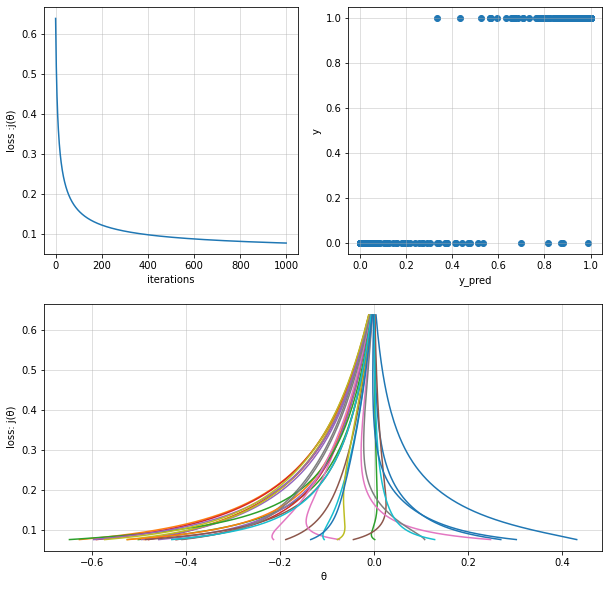

In [12]:
logisitc_reg_model1 = LogisticRegression(alpha=0.03,iterations=1000)
logisitc_reg_model1.train(X=X_scaled, y=y, method="BGD")

y = logisitc_reg_model1.y
y_pred = logisitc_reg_model1.predict(X_scaled)
theta = logisitc_reg_model1.theta
theta_history = logisitc_reg_model1.theta_history
cost_history = logisitc_reg_model1.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

random initial θ value : [[7.65187490e-04 8.83306704e-04 9.28965607e-04 8.93701617e-04
  6.09929257e-06 5.46640161e-04 5.33975455e-04 9.73150681e-04
  5.73071745e-04 8.82314603e-04 3.90286318e-04 5.21723457e-04
  8.18316455e-04 8.39156548e-05 4.68111435e-04 7.08489348e-04
  3.79124318e-04 6.15675589e-04 6.94508981e-04 4.84347468e-04
  6.18218930e-04 7.62798959e-04 4.42517493e-04 2.96191391e-05
  8.37050378e-04 8.30856568e-04 4.79802905e-04 1.13236288e-04
  7.21571964e-04 5.06595405e-04 5.63981276e-04]]
Fit theta : [[ 0.43970739 -0.4901958  -0.49970098 -0.48072701 -0.49668781 -0.19140376
  -0.07380667 -0.4056568  -0.52664726 -0.10868733  0.26871086 -0.52712669
  -0.00251324 -0.42569534 -0.45988281 -0.04723884  0.24866624  0.10988442
  -0.0746923   0.13276936  0.30023317 -0.62725765 -0.6506531  -0.5912409
  -0.59696347 -0.48959299 -0.20929887 -0.41998326 -0.57135174 -0.42339679
  -0.12982733]]

Confusion Matrix : 
[[205   7]
 [  2 355]]
Accuracy Score   : 
0.984182776801406



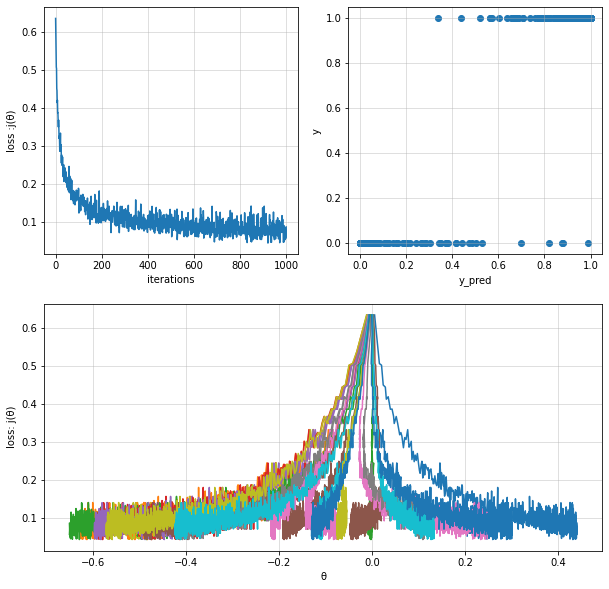

In [13]:
logisitc_reg_model2 = LogisticRegression(alpha=0.03,iterations=1000)
logisitc_reg_model2.train(X=X_scaled, y=y, method="SGD",batch_size=200)

y = logisitc_reg_model2.y
y_pred = logisitc_reg_model2.predict(X_scaled)
theta = logisitc_reg_model2.theta
theta_history = logisitc_reg_model2.theta_history
cost_history = logisitc_reg_model2.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

# Logistic Regression with Regularization

random initial θ value : [[8.80674353e-04 4.86327828e-04 8.06903733e-04 9.76145782e-04
  6.36044509e-04 3.41992919e-04 1.24661317e-04 8.84097575e-04
  1.98152221e-04 4.62979547e-04 5.36618699e-04 7.45266600e-04
  2.38604425e-04 7.76628789e-04 1.35782926e-04 9.15652634e-04
  8.58672870e-05 5.83597945e-04 7.05759880e-06 4.68444222e-04
  9.86717198e-04 5.09293212e-04 4.10443505e-04 4.63836359e-04
  5.23233861e-04 4.07835346e-04 9.36158128e-04 9.99639646e-04
  2.96311142e-04 8.55230189e-04 4.98139789e-04]]
Fit theta : [[ 0.28631561 -0.30706259 -0.29442676 -0.30300848 -0.30814444 -0.11210781
  -0.08169066 -0.26129107 -0.33028883 -0.08236309  0.13873566 -0.30874026
   0.00429586 -0.2548694  -0.27197504 -0.02513431  0.1003117   0.04998655
  -0.0583757   0.05577081  0.1454914  -0.38080108 -0.36942409 -0.36235092
  -0.36087971 -0.2771889  -0.16125525 -0.26268029 -0.35221561 -0.25949589
  -0.10340825]]

Confusion Matrix : 
[[205   7]
 [  2 355]]
Accuracy Score   : 
0.984182776801406



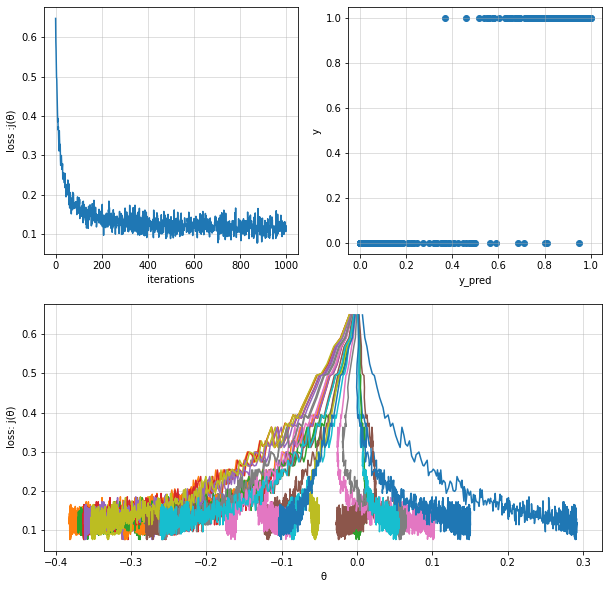

In [16]:
logisitc_reg_model3 = LogisticRegression(alpha=0.03,iterations=1000)
logisitc_reg_model3.train(X=X_scaled, y=y, method="SGD",batch_size=200,regularization=True,penalty=1.0)

y = logisitc_reg_model3.y
y_pred = logisitc_reg_model3.predict(X_scaled)
theta = logisitc_reg_model3.theta
theta_history = logisitc_reg_model3.theta_history
cost_history = logisitc_reg_model3.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

random initial θ value : [[6.58760140e-04 3.19723021e-04 9.85223890e-04 1.86584629e-04
  5.29830267e-04 5.88412291e-04 7.18138387e-04 3.24457079e-04
  2.63065124e-06 9.02588841e-04 1.98046509e-04 3.83707894e-04
  3.51118601e-04 5.40901055e-04 9.25917080e-04 9.10910206e-04
  9.46594299e-04 9.90310957e-04 8.63034503e-04 1.47034394e-04
  4.06536388e-05 3.37176062e-04 1.83263989e-04 1.36266099e-04
  9.82837635e-04 5.28097268e-04 8.18095011e-04 5.32775609e-04
  8.54459107e-04 7.63582035e-04 5.15149143e-04]]
Fit theta : [[ 0.24023468 -0.25672799 -0.22183603 -0.25443413 -0.25472665 -0.0964851
  -0.0923963  -0.210685   -0.26979023 -0.07381048  0.10263694 -0.23491846
   0.00431378 -0.19963187 -0.21148968 -0.00984149  0.05727407  0.04099328
  -0.05061047  0.03714117  0.10573659 -0.30732501 -0.27443945 -0.29528261
  -0.28944271 -0.21215454 -0.14642318 -0.20807519 -0.28538013 -0.20169003
  -0.08572841]]

Confusion Matrix : 
[[202  10]
 [  3 354]]
Accuracy Score   : 
0.9771528998242531



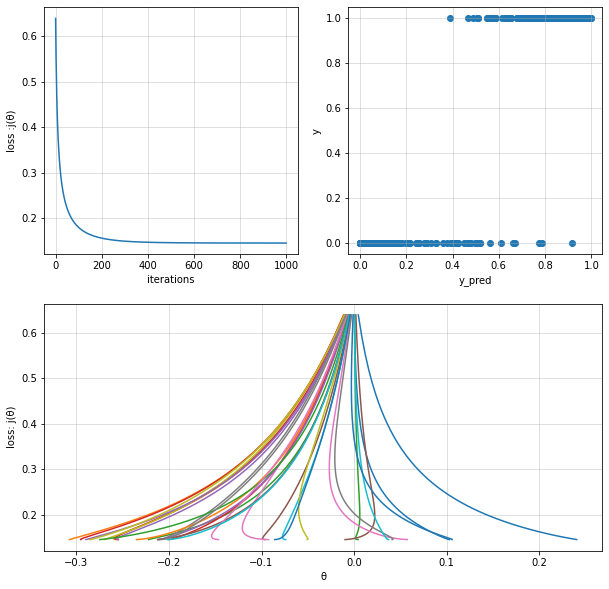

In [18]:
logisitc_reg_model4 = LogisticRegression(alpha=0.03,iterations=1000)
logisitc_reg_model4.train(X=X_scaled, y=y, method="BGD",regularization=True,penalty=2.0)

y = logisitc_reg_model4.y
y_pred = logisitc_reg_model4.predict(X_scaled)
theta = logisitc_reg_model4.theta
theta_history = logisitc_reg_model4.theta_history
cost_history = logisitc_reg_model4.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

## Comparing With Data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
from sklearn.compose import ColumnTransformer

In [20]:
churn_df = pd.read_csv("./dataset/ChurnClassification.csv")

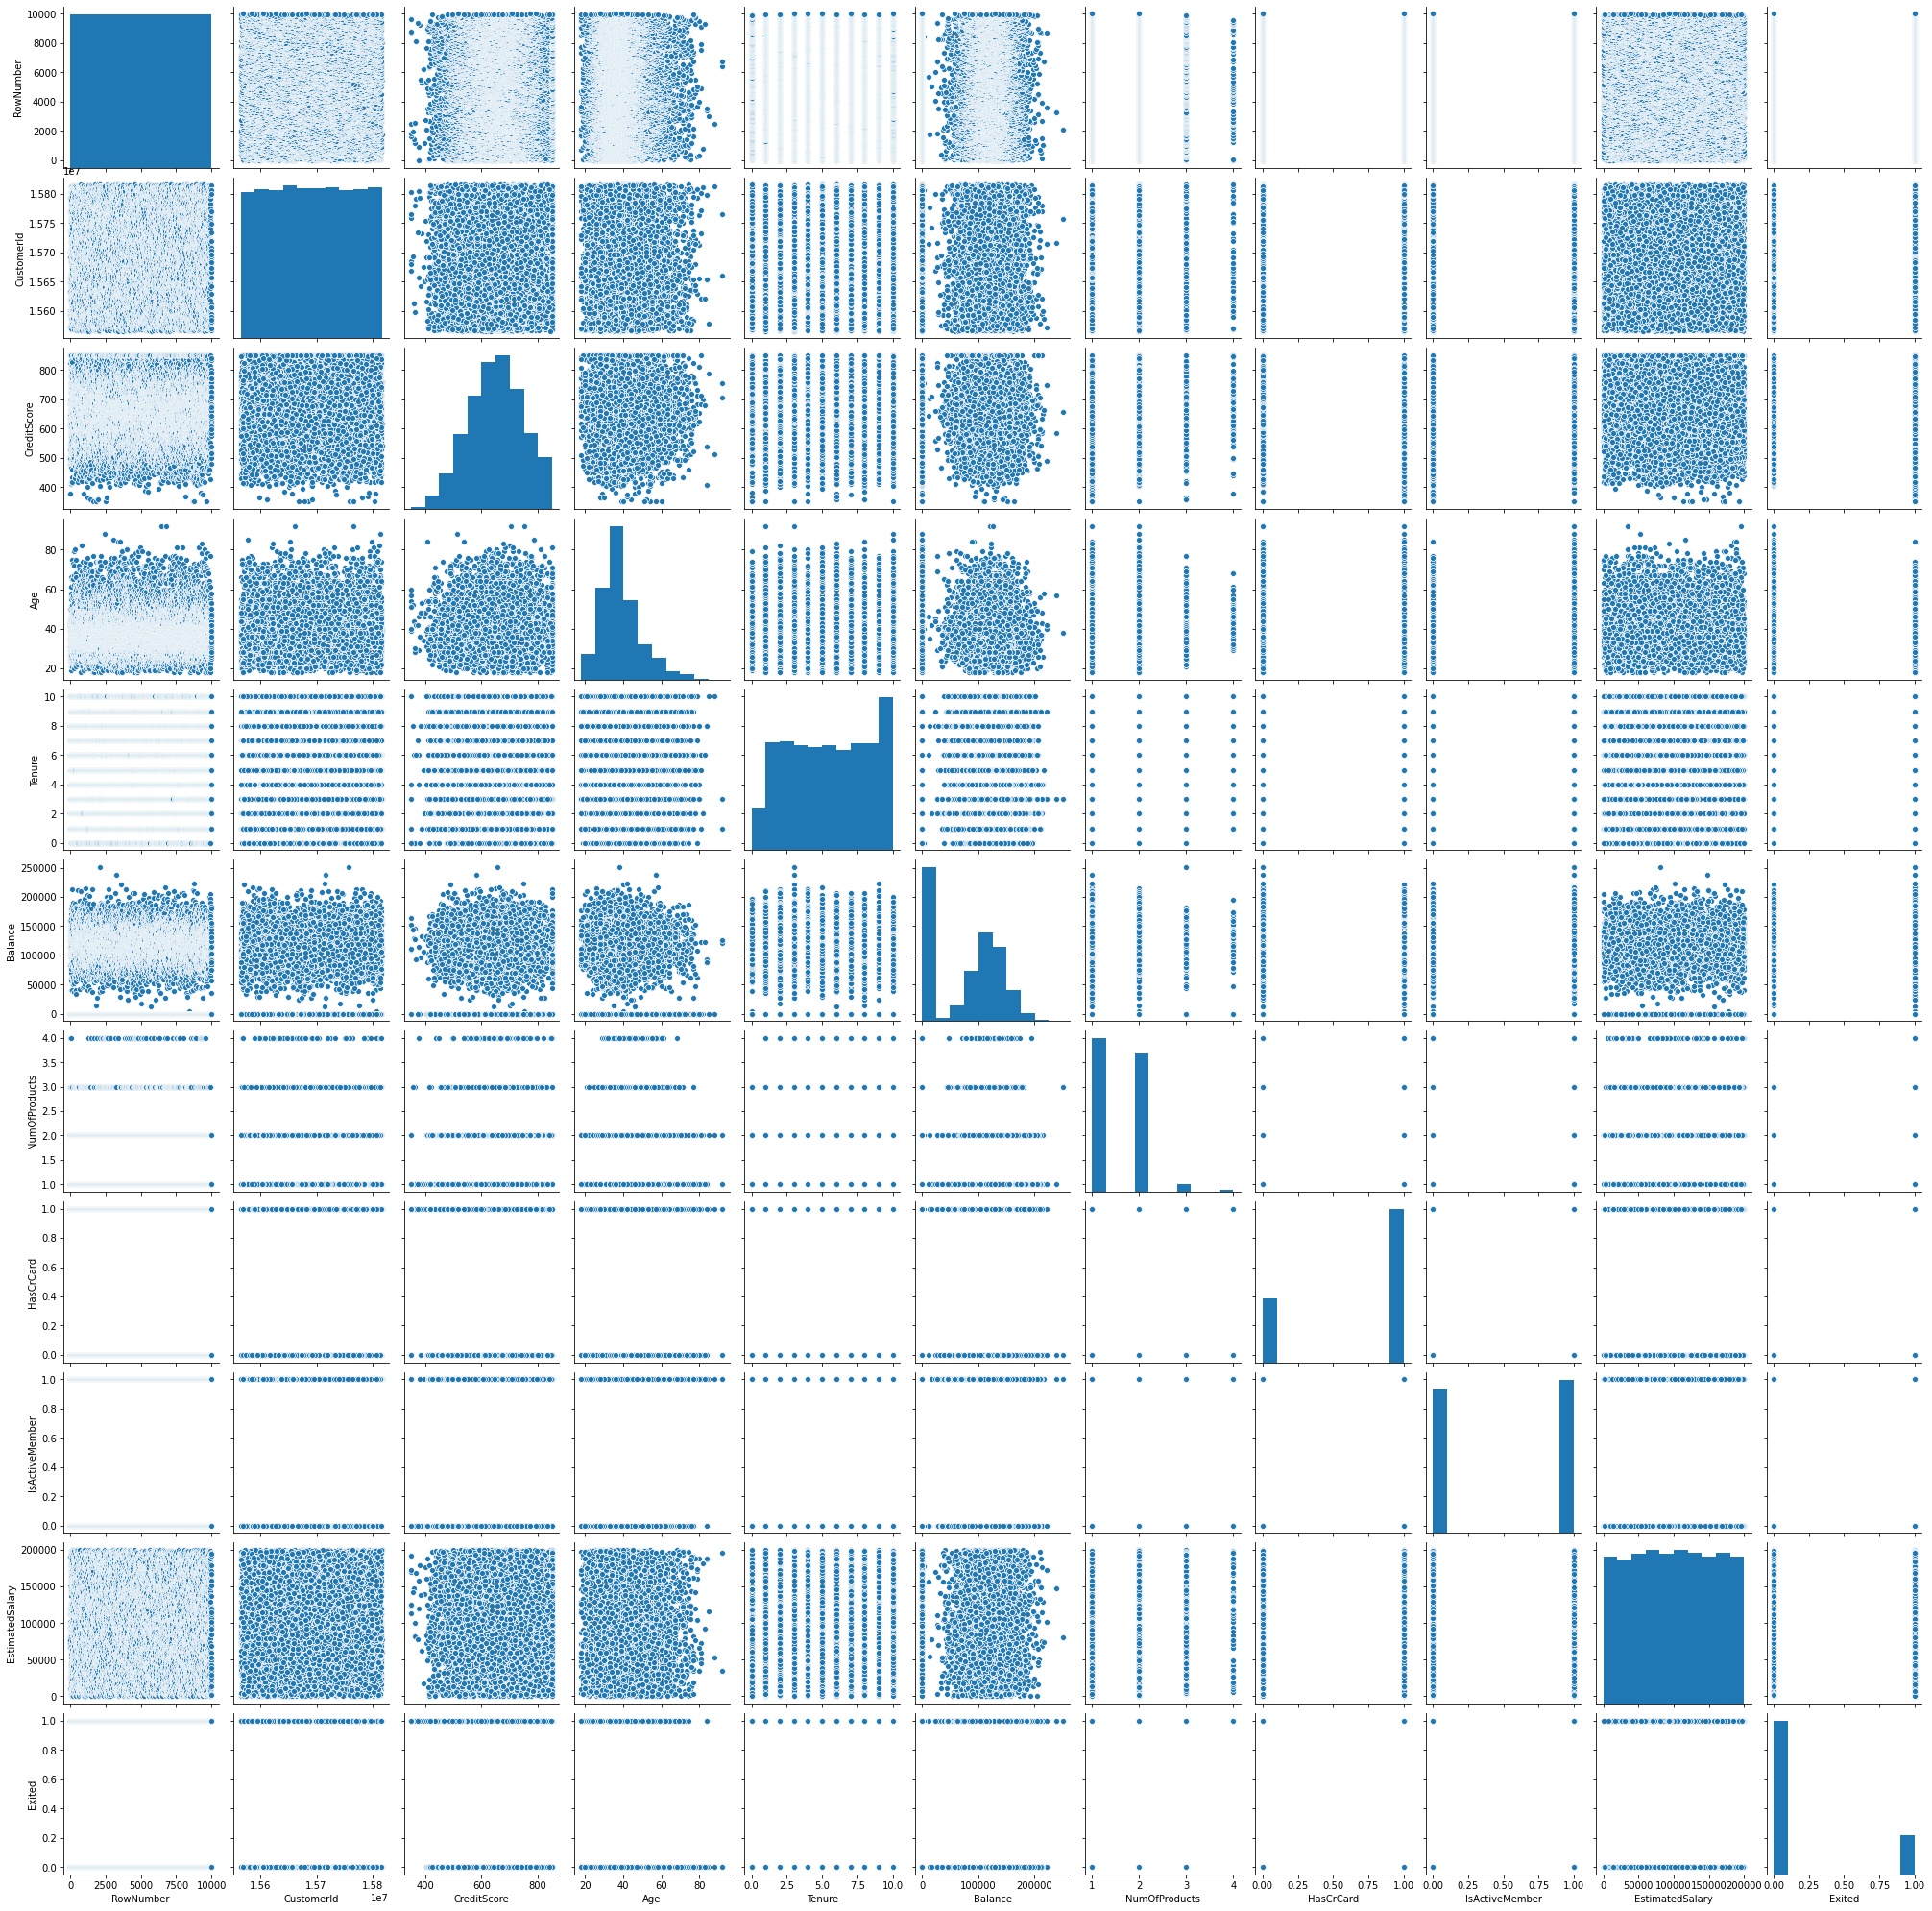

In [21]:
sns.pairplot(churn_df)

In [22]:
churn_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [23]:
feature_col = ['CreditScore','Geography','Gender', 'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
target_col = ['Exited']

X = churn_df[feature_col].values
y = churn_df[target_col].values
X,y

(array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
        [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
        [502, 'France', 'Female', ..., 1, 0, 113931.57],
        ...,
        [709, 'France', 'Female', ..., 0, 1, 42085.58],
        [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
        [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object),
 array([[1],
        [0],
        [1],
        ...,
        [1],
        [1],
        [0]]))

In [24]:
le_1 = LabelEncoder()
le_2 = LabelEncoder()
X[:, 1] = le_1.fit_transform(X[:, 1])
X[:, 2] = le_1.fit_transform(X[:, 2])
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [25]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Logisitic Regression without Regularization

random initial θ value : [[2.96874191e-04 1.64707673e-04 2.79302112e-04 6.02324917e-04
  8.81409537e-04 4.99760779e-04 8.74186384e-04 7.03703720e-04
  4.39079317e-04 5.14344066e-04 4.56461115e-04 6.66049676e-04
  2.61852632e-05]]
Fit theta : [[-1.57106199 -0.13516138  0.22871233 -0.07030776 -0.06807866 -0.25177422
   0.70196651 -0.0737087   0.14271318 -0.08231368 -0.02200759 -0.46802625
   0.02699538]]

Confusion Matrix : 
[[6150  218]
 [1306  326]]
Accuracy Score   : 
0.8095



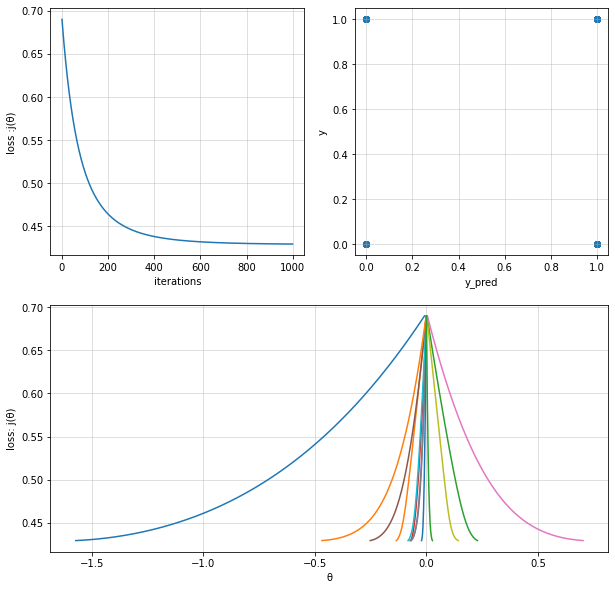

In [31]:
log_reg_normal_bgd = LogisticRegression(alpha=0.03,iterations=1000)
log_reg_normal_bgd.train(X=X_train, y=y_train, method="BGD")

y = log_reg_normal_bgd.y
y_pred = log_reg_normal_bgd.predict(X_train)
theta = log_reg_normal_bgd.theta
theta_history = log_reg_normal_bgd.theta_history
cost_history = log_reg_normal_bgd.cost_history

print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred>0.5,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

random initial θ value : [[4.56101504e-04 3.88376374e-04 6.28788492e-04 7.27589474e-04
  2.36703258e-04 8.33123543e-04 1.66536549e-04 5.93623024e-05
  5.20544589e-04 2.51094632e-04 1.97660446e-05 9.17206885e-04
  6.86960324e-04]]
Fit theta : [[-1.57375854 -0.13746117  0.23052535 -0.06871819 -0.066169   -0.24774943
   0.6995043  -0.07219963  0.13883175 -0.0820752  -0.01862302 -0.46716655
   0.0259359 ]]

Confusion Matrix : 
[[6160  208]
 [1310  322]]
Accuracy Score   : 
0.81025



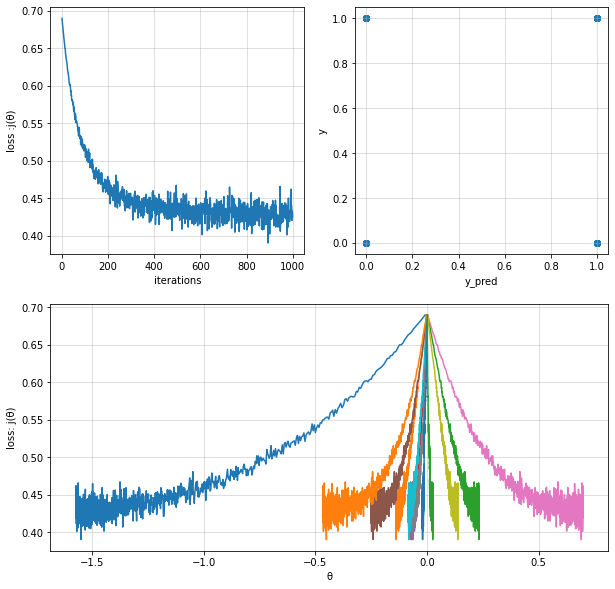

In [41]:
log_reg_normal_sgd = LogisticRegression(alpha=0.03,iterations=1000)
log_reg_normal_sgd.train(X=X_train, y=y_train, method="SGD",batch_size=2500)

y = log_reg_normal_sgd.y
y_pred = log_reg_normal_sgd.predict(X_train)
theta = log_reg_normal_sgd.theta
theta_history = log_reg_normal_sgd.theta_history
cost_history = log_reg_normal_sgd.cost_history

print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred>0.5,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

### Logisitic Regression with Regularization

random initial θ value : [[8.29452876e-04 8.95371027e-05 3.36975595e-04 5.30746842e-04
  7.74483972e-05 2.97792470e-04 2.41849121e-04 3.24303839e-04
  1.24011201e-05 8.41086323e-04 4.31873780e-04 8.71280408e-06
  1.85109723e-04]]
Fit theta : [[-1.51738474 -0.13105218  0.22158022 -0.06817472 -0.06515834 -0.24108948
   0.67315175 -0.07020727  0.13728762 -0.07931884 -0.02102032 -0.4450382
   0.02582194]]

Confusion Matrix : 
[[6157  211]
 [1309  323]]
Accuracy Score   : 
0.81



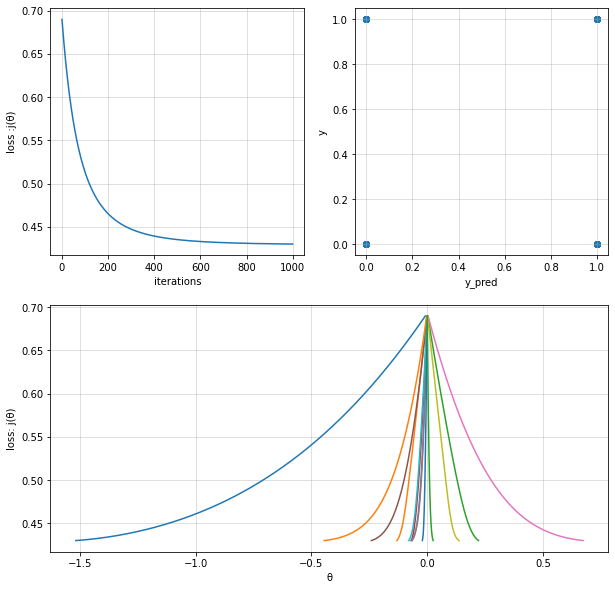

In [43]:
log_reg_reg_bgd = LogisticRegression(alpha=0.03,iterations=1000)
log_reg_reg_bgd.train(X=X_train, y=y_train, method="BGD",regularization=True,penalty=1.0)

y = log_reg_reg_bgd.y
y_pred = log_reg_reg_bgd.predict(X_train)
theta = log_reg_reg_bgd.theta
theta_history = log_reg_reg_bgd.theta_history
cost_history = log_reg_reg_bgd.cost_history

print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred>0.5,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

random initial θ value : [[2.85724001e-04 1.08446317e-04 9.80557768e-04 8.69111745e-04
  2.77465570e-04 8.36717292e-04 7.99220855e-04 8.47308838e-05
  6.43496794e-04 9.96555757e-04 5.58903892e-06 7.15608373e-04
  3.33894294e-04]]
Fit theta : [[-1.5791232  -0.13109824  0.22532301 -0.07107289 -0.06496131 -0.25782916
   0.71391121 -0.07789604  0.14038189 -0.08509207 -0.02222661 -0.48836959
   0.02930934]]

Confusion Matrix : 
[[6143  225]
 [1298  334]]
Accuracy Score   : 
0.809625



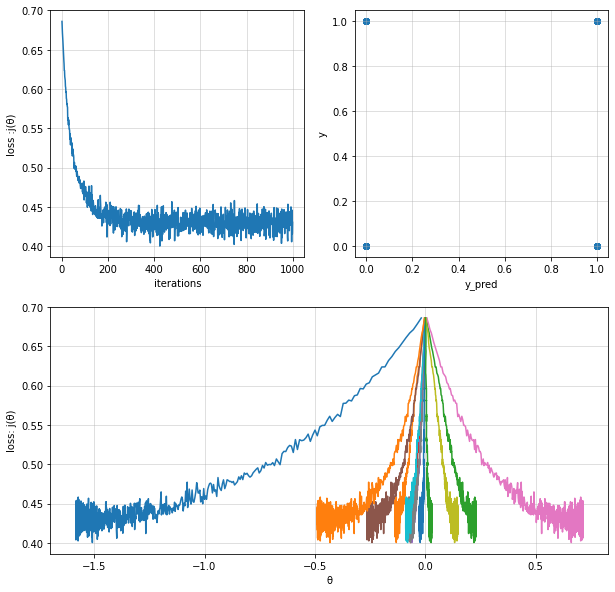

In [48]:
log_reg_reg_sgd = LogisticRegression(alpha=0.06,iterations=1000)
log_reg_reg_sgd.train(X=X_train, y=y_train, method="SGD",batch_size=3000,regularization=True,penalty=1.5)

y = log_reg_reg_sgd.y
y_pred = log_reg_reg_sgd.predict(X_train)
theta = log_reg_reg_sgd.theta
theta_history = log_reg_reg_sgd.theta_history
cost_history = log_reg_reg_sgd.cost_history

print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred>0.5,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()